In [1]:
%matplotlib inline

import pandas as pd

# these will be useful later
import numpy  as np
from matplotlib import pyplot as plt

In [2]:
suicide = pd.read_csv('MASTER1.csv')
suicide.columns


Index(['Year', 'County', 'Average NY AGI', 'Crime_Total',
       'Violent Crime Total', 'Deaths', 'Crude Rate', 'Adjusted Rate',
       'Suicide Deaths', 'Population', 'Percentage Deaths by Suicide',
       'Suicide Rate Per 100,000', 'Population Total',
       'Population Black Non Hispanic', 'Population Hispanic',
       'Population Other Non Hispanic', 'Population White Non Hispanic',
       'Population Male', 'Population Female'],
      dtype='object')

In [3]:
suicide.head(5)


,Year,County,Average NY AGI,Crime_Total,Violent Crime Total,Deaths,Crude Rate,Adjusted Rate,Suicide Deaths,Population,Percentage Deaths by Suicide,"Suicide Rate Per 100,000",Population Total,Population Black Non Hispanic,Population Hispanic,Population Other Non Hispanic,Population White Non Hispanic,Population Male,Population Female
0,2010,Queens,39675,38808,9725,13657,612.2,557.1,152,2230722,0.0111,6.8,2230722,420448,613750,560063,636461,1079803,1150919
1,2012,Suffolk,74303,28871,2127,11527,768.8,643.8,149,1499273,0.0129,9.9,1499273,111185,259534,60991,1067563,738012,761261
2,2012,Queens,41215,40199,10753,13935,613.1,544.0,147,2272771,0.0105,6.5,2272771,423580,634077,583759,631355,1102593,1170178
3,2013,Queens,41792,39913,10740,13876,604.3,530.9,141,2296175,0.0102,6.1,2296175,426963,642259,599464,627489,1115121,1181054
4,2013,Suffolk,72061,26373,1930,11546,769.9,629.6,141,1499738,0.0122,9.4,1499738,112051,265513,62351,1059823,738426,761312


In [4]:
suicide.columns


Index(['Year', 'County', 'Average NY AGI', 'Crime_Total',
       'Violent Crime Total', 'Deaths', 'Crude Rate', 'Adjusted Rate',
       'Suicide Deaths', 'Population', 'Percentage Deaths by Suicide',
       'Suicide Rate Per 100,000', 'Population Total',
       'Population Black Non Hispanic', 'Population Hispanic',
       'Population Other Non Hispanic', 'Population White Non Hispanic',
       'Population Male', 'Population Female'],
      dtype='object')

In [5]:
import seaborn as sns


In [6]:
from scipy import stats
import statsmodels.formula.api as sm

In [7]:
suicide.dtypes
suicide['Year'].astype(str)

0      2010
1      2012
2      2012
3      2013
4      2013
5      2008
6      2011
7      2007
8      2011
9      2010
10     2006
11     2004
12     2009
13     2013
14     2009
15     2005
16     2012
17     2011
18     2010
19     2007
20     2005
21     2004
22     2003
23     2008
24     2011
25     2008
26     2005
27     2003
28     2010
29     2006
       ... 
630    2003
631    2003
632    2013
633    2010
634    2009
635    2008
636    2008
637    2008
638    2007
639    2007
640    2005
641    2004
642    2004
643    2003
644    2003
645    2003
646    2003
647    2011
648    2011
649    2010
650    2009
651    2009
652    2009
653    2006
654    2005
655    2004
656    2003
657    2012
658    2013
659    2013
Name: Year, dtype: object

In [8]:
suicide.County.head()



0     Queens
1    Suffolk
2     Queens
3     Queens
4    Suffolk
Name: County, dtype: object

In [9]:
suicide['Percentage Deaths by Suicide'].head(5)

0    0.0111
1    0.0129
2    0.0105
3    0.0102
4    0.0122
Name: Percentage Deaths by Suicide, dtype: float64

In [10]:
suicide['% Deaths by Suicide'] = suicide['Percentage Deaths by Suicide']*100
suicide['% Deaths by Suicide']
table = suicide[['Year', 'County', 'Average NY AGI', 'Crime_Total', '% Deaths by Suicide']]

table

,Year,County,Average NY AGI,Crime_Total,% Deaths by Suicide
0,2010,Queens,39675,38808,1.11
1,2012,Suffolk,74303,28871,1.29
2,2012,Queens,41215,40199,1.05
3,2013,Queens,41792,39913,1.02
4,2013,Suffolk,72061,26373,1.22
5,2008,Kings,43090,59547,0.86
6,2011,Queens,40108,39863,1.01
7,2007,Queens,40485,42630,0.95
8,2011,Suffolk,71267,31406,1.20
9,2010,Suffolk,69331,32638,1.19


In [11]:


table['Year'] = table['Year'].astype(str)
table['Year'].head()

/Users/Vane/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0    2010
1    2012
2    2012
3    2013
4    2013
Name: Year, dtype: object

In [12]:
suicide['log_income'] = np.log(suicide['Average NY AGI'])

In [13]:
suicide['log_income'].head(5)

0    10.588477
1    11.215907
2    10.626558
3    10.640460
4    11.185268
Name: log_income, dtype: float64

In [14]:
suicide.columns


Index(['Year', 'County', 'Average NY AGI', 'Crime_Total',
       'Violent Crime Total', 'Deaths', 'Crude Rate', 'Adjusted Rate',
       'Suicide Deaths', 'Population', 'Percentage Deaths by Suicide',
       'Suicide Rate Per 100,000', 'Population Total',
       'Population Black Non Hispanic', 'Population Hispanic',
       'Population Other Non Hispanic', 'Population White Non Hispanic',
       'Population Male', 'Population Female', '% Deaths by Suicide',
       'log_income'],
      dtype='object')

In [37]:
model = sm.ols(formula = 'PerSuicide ~ Crime + Year + Income', 
               data = suicide.rename(columns = {"% Deaths by Suicide" : "PerSuicide",
                                                  "Crime_Total" : "Crime", "Year":"Year", "log_income": "Income"})).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PerSuicide   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     31.18
Date:                Mon, 28 Nov 2016   Prob (F-statistic):           7.48e-19
Time:                        17:10:32   Log-Likelihood:                -489.02
No. Observations:                 660   AIC:                             986.0
Df Residuals:                     656   BIC:                             1004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -92.6328     12.714     -7.286      0.000      -117.598   -67.668
Crime      -9.087e-06   1.71e-06     -5.327      0.000     -1.24e-05 -5.74e-06
Year           0.0476      0.006      7.437      0.000         0.035     0.060
Income        -0.1698      0.080     -2.125      0.034        -0.327    -0.013
==============================================================================
Omnibus:                      270.741   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2984.703
Skew:                           1.513   Prob(JB):                         0.00
Kurtosis:                      12.969   Cond. No.                     8.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
suicide.columns


Index(['Year', 'County', 'Average NY AGI', 'Crime_Total',
       'Violent Crime Total', 'Deaths', 'Crude Rate', 'Adjusted Rate',
       'Suicide Deaths', 'Population', 'Percentage Deaths by Suicide',
       'Suicide Rate Per 100,000', 'Population Total',
       'Population Black Non Hispanic', 'Population Hispanic',
       'Population Other Non Hispanic', 'Population White Non Hispanic',
       'Population Male', 'Population Female', '% Deaths by Suicide',
       'log_income'],
      dtype='object')

In [17]:
suicide["Crime_1000"]= np.log(suicide['Crime_Total'])

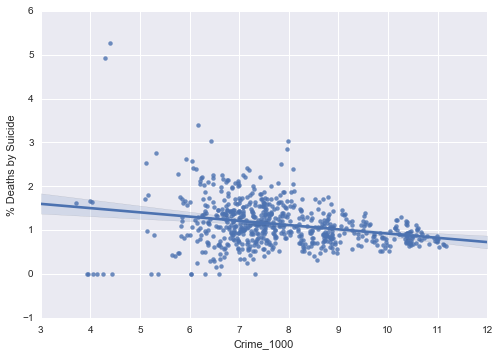

In [18]:

sns.regplot(data = suicide, x = "Crime_1000", y = "% Deaths by Suicide")


In [19]:
suicide["% Deaths by Suicide"].head(5)

0    1.11
1    1.29
2    1.05
3    1.02
4    1.22
Name: % Deaths by Suicide, dtype: float64

In [20]:
suicide_2003 = suicide[suicide["Year"] == 2003]
suicide_2003_graph = suicide_2003.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

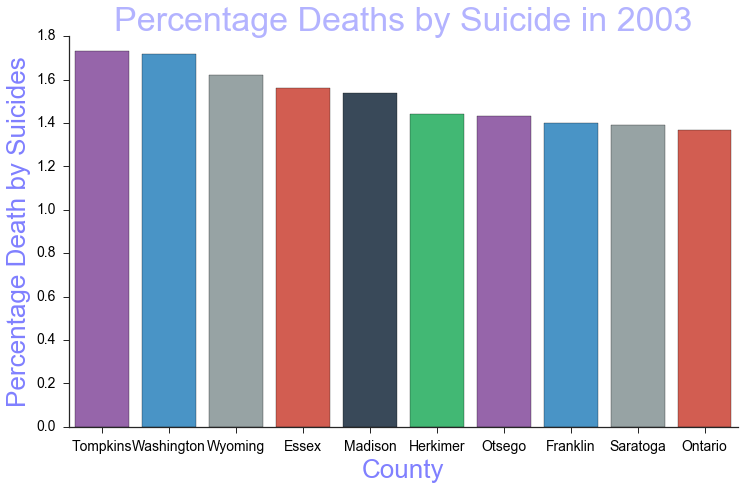

In [21]:
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2003_graph["County"]
y = suicide_2003_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette 
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2003', 
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

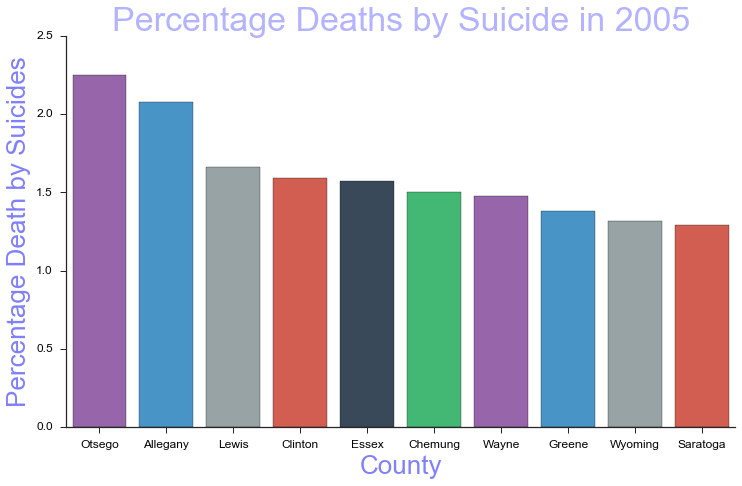

In [22]:
suicide_2005 = suicide[suicide["Year"] == 2005]
suicide_2005_graph = suicide_2005.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2005_graph["County"]
y = suicide_2005_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette 
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2005', 
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")




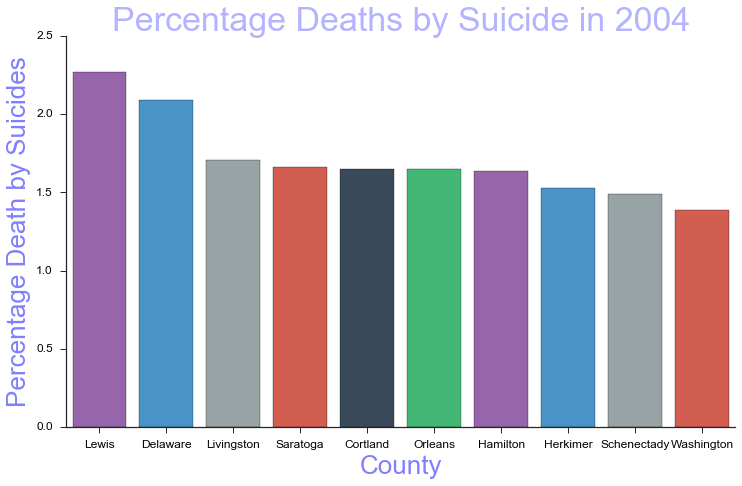

In [23]:
suicide_2004 = suicide[suicide["Year"] == 2004]
suicide_2004_graph = suicide_2004.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2004_graph["County"]
y = suicide_2004_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2004',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")


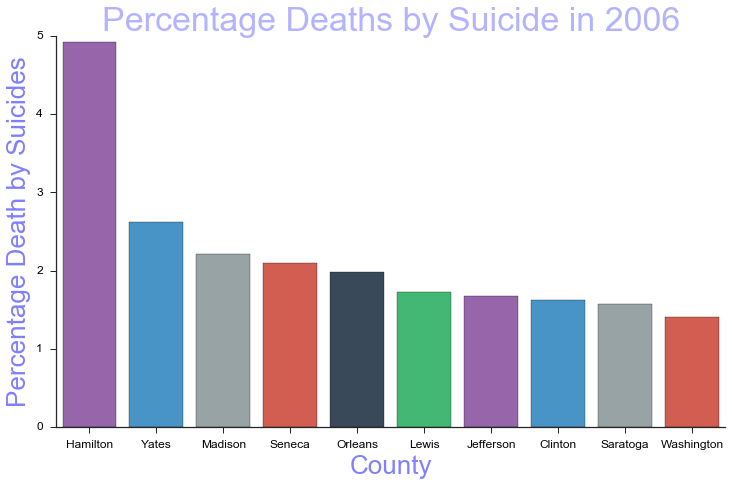

In [24]:
suicide_2006 = suicide[suicide["Year"] == 2006]
suicide_2006_graph = suicide_2006.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2006_graph["County"]
y = suicide_2006_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2006',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")


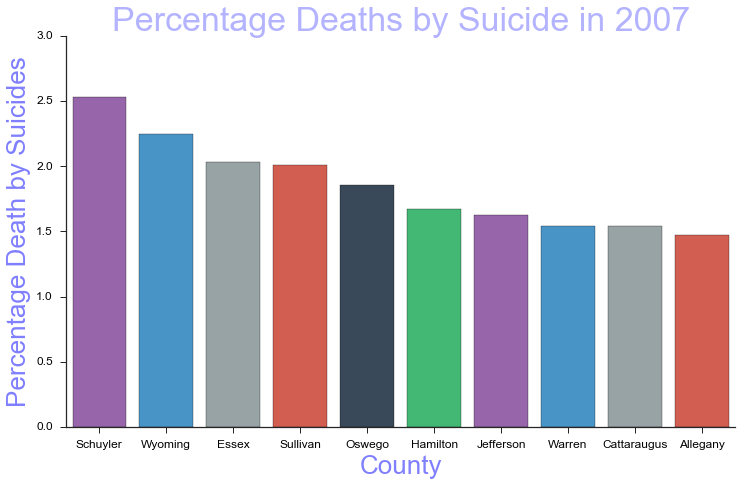

In [25]:
suicide_2007 = suicide[suicide["Year"] == 2007]
suicide_2007_graph = suicide_2007.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2007_graph["County"]
y = suicide_2007_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2007',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

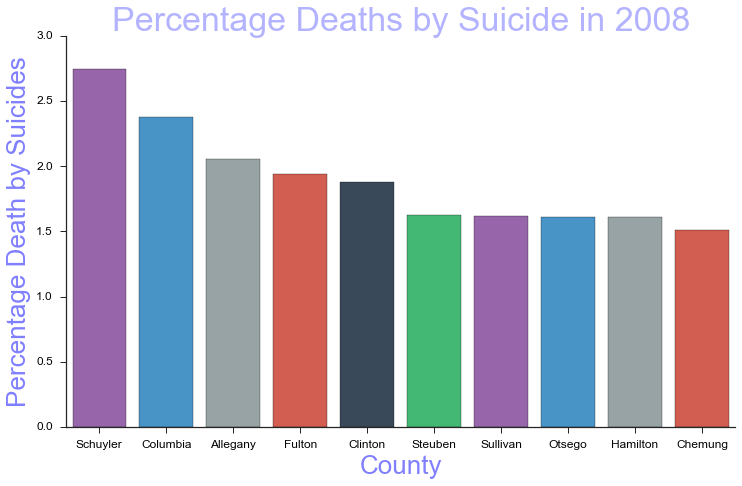

In [26]:
suicide_2008 = suicide[suicide["Year"] == 2008]
suicide_2008_graph = suicide_2008.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2008_graph["County"]
y = suicide_2008_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2008',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

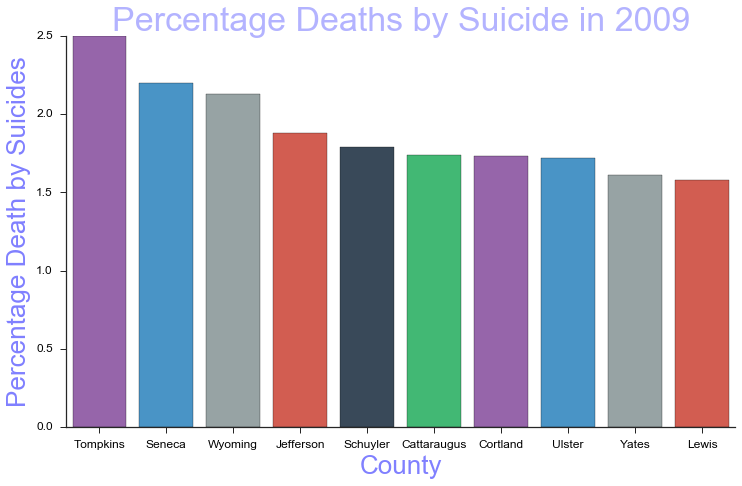

In [27]:
suicide_2009 = suicide[suicide["Year"] == 2009]
suicide_2009_graph = suicide_2009.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2009_graph["County"]
y = suicide_2009_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2009',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

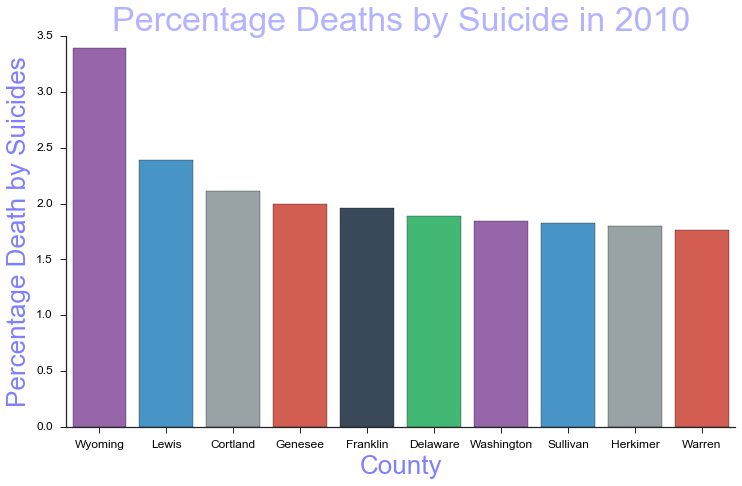

In [28]:
suicide_2010 = suicide[suicide["Year"] == 2010]
suicide_2010_graph = suicide_2010.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2010_graph["County"]
y = suicide_2010_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2010',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

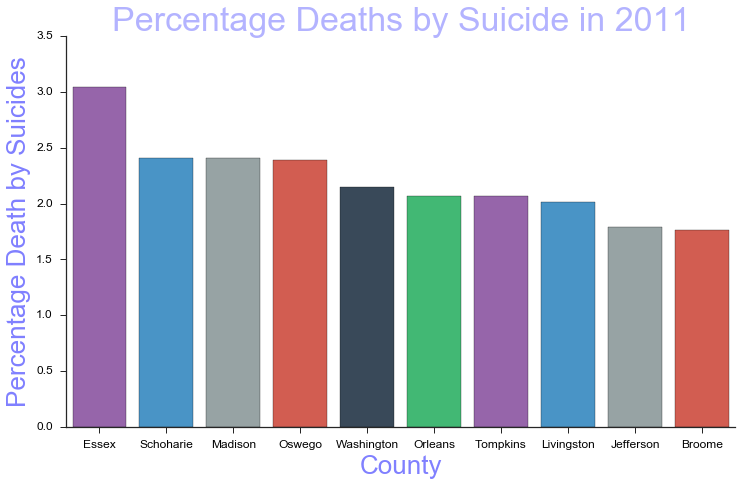

In [29]:
suicide_2011 = suicide[suicide["Year"] == 2011]
suicide_2011_graph = suicide_2011.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2011_graph["County"]
y = suicide_2011_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2011',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

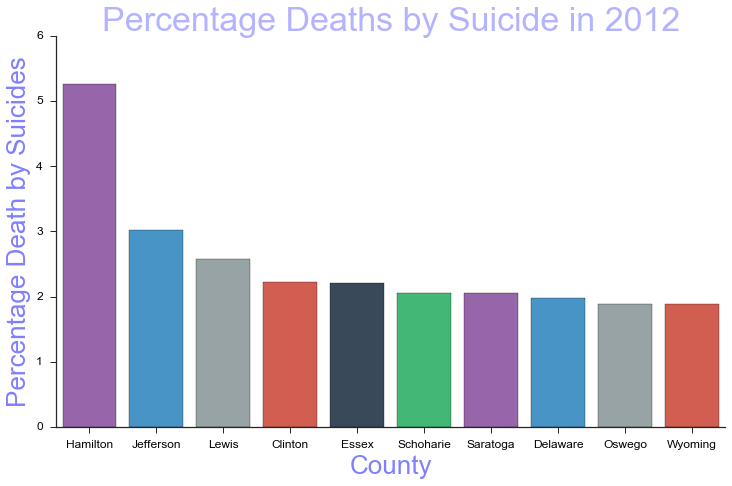

In [30]:
#2012

suicide_2012 = suicide[suicide["Year"] == 2012]
suicide_2012_graph = suicide_2012.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2012_graph["County"]
y = suicide_2012_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2012',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")


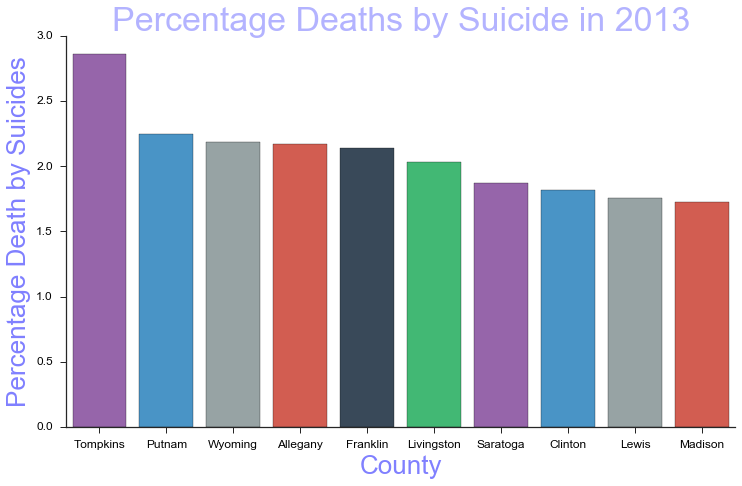

In [31]:
suicide_2013 = suicide[suicide["Year"] == 2013]
suicide_2013_graph = suicide_2013.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2013_graph["County"]
y = suicide_2013_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2013',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

In [32]:
suicide.groupby("County")["Crime_Total"].count()

County
Albany         11
Allegany       11
Bronx          11
Broome         11
Cattaraugus    11
Cayuga         11
Chautauqua     11
Chemung        11
Chenango       11
Clinton        11
Columbia       11
Cortland       11
Delaware       11
Dutchess       11
Erie           11
Essex          11
Franklin       11
Fulton         11
Genesee        11
Greene         11
Hamilton       11
Herkimer       11
Jefferson      11
Kings          11
Lewis          11
Livingston     11
Madison        11
Monroe         11
Montgomery     11
Nassau         11
Niagara        11
Oneida         11
Onondaga       11
Ontario        11
Orange         11
Orleans        11
Oswego         11
Otsego         11
Putnam         11
Queens         11
Rensselaer     11
Richmond       11
Rockland       11
Saratoga       11
Schenectady    11
Schoharie      11
Schuyler       11
Seneca         11
Steuben        11
Suffolk        11
Sullivan       11
Tioga          11
Tompkins       11
Ulster         11
Warren         11
Was

In [33]:
suicide_2013 = suicide[suicide["Year"] == 2013]
suicide_2013_graph = suicide_2013.sort_values(by = "County", ascending = False).head(100)
suicide_2013_graph

,Year,County,Average NY AGI,Crime_Total,Violent Crime Total,Deaths,Crude Rate,Adjusted Rate,Suicide Deaths,Population,...,Population Total,Population Black Non Hispanic,Population Hispanic,Population Other Non Hispanic,Population White Non Hispanic,Population Male,Population Female,% Deaths by Suicide,log_income,Crime_1000
659,2013,Yates,37282,413,14,246,977.9,690.5,0,25156,...,25156,319,508,174,24155,12251,12905,0.00,10.526266,6.023448
402,2013,Wyoming,41143,510,41,366,881.3,756.5,8,41531,...,41531,2441,1280,322,37488,22629,18902,2.19,10.624809,6.234411
67,2013,Westchester,133746,14129,2191,7015,724.1,534.3,65,968802,...,968802,135977,225423,61536,545866,467867,500935,0.93,11.803698,9.555985
309,2013,Wayne,42651,1842,153,819,885.7,711.2,11,92473,...,92473,3193,3651,989,84640,45879,46594,1.34,10.660806,7.518607
363,2013,Washington,39196,882,71,562,890.7,637.8,9,63093,...,63093,2035,1523,508,59027,32586,30507,1.60,10.576330,6.782192
446,2013,Warren,46172,1292,53,669,1024.0,664.7,7,65337,...,65337,939,1388,755,62255,31945,33392,1.05,10.740129,7.163947
206,2013,Ulster,49269,3580,294,1661,917.7,669.7,17,180998,...,180998,11795,17115,4317,147771,89887,91111,1.02,10.805050,8.183118
189,2013,Tompkins,55509,2902,109,665,641.8,641.2,19,103617,...,103617,4813,4768,10786,83250,51089,52528,2.86,10.924300,7.973155
609,2013,Tioga,43951,650,27,349,694.6,514.9,3,50243,...,50243,557,809,537,48340,24907,25336,0.86,10.690831,6.476972
275,2013,Sullivan,44822,1718,172,696,907.8,739.2,12,76665,...,76665,6887,11050,1593,57135,39332,37333,1.72,10.710454,7.448916


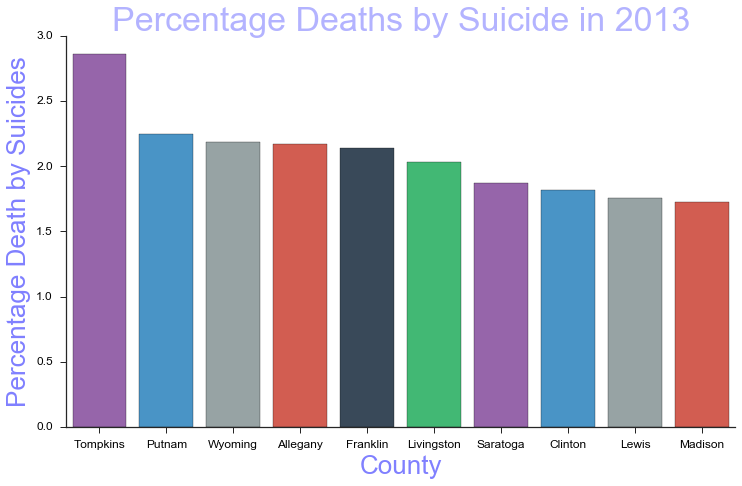

In [34]:
suicide_2013 = suicide[suicide["Year"] == 2013]
suicide_2013_graph = suicide_2013.sort_values(by = "% Deaths by Suicide", ascending = False).head(10)

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

x = suicide_2013_graph["County"]
y = suicide_2013_graph["% Deaths by Suicide"]

# This Function takes as input a custom palette
g = sns.barplot(x, y, palette=sns.color_palette(flatui))

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Percentage Deaths by Suicide in 2013',
    fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("County",size = 26,color="b",alpha=0.50)
# Set the ylabel of the graph from here
g.set_ylabel("Percentage Death by Suicides",size = 26,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")